In [1]:
#importing modules.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data.
df=pd.read_excel("zomato_train.xlsx")
df.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4
3,https://www.zomato.com/bangalore/sriracha-lave...,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,+91 8041755366\n+91 7022422473,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
4,https://www.zomato.com/bangalore/sri-ganesh-ju...,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,+91 9845623889,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


In [3]:
df.shape

(41373, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41373 entries, 0 to 41372
Data columns (total 17 columns):
url                            41373 non-null object
address                        41373 non-null object
name                           41373 non-null object
online_order                   41373 non-null object
book_table                     41373 non-null object
votes                          41373 non-null int64
phone                          40402 non-null object
location                       41358 non-null object
rest_type                      41198 non-null object
dish_liked                     18901 non-null object
cuisines                       41341 non-null object
approx_cost(for two people)    41094 non-null object
reviews_list                   41373 non-null object
menu_item                      41373 non-null object
listed_in(type)                41373 non-null object
listed_in(city)                41373 non-null object
rates                          33392 non-nul

In [5]:
df.describe()

,votes
count,41373.000000
mean,283.771493
std,806.112459
min,0.000000
25%,7.000000
50%,41.000000
75%,200.000000
max,16832.000000


In [6]:
#Finding the number of missing values every column have.
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
votes                              0
phone                            971
location                          15
rest_type                        175
dish_liked                     22472
cuisines                          32
approx_cost(for two people)      279
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rates                           7981
dtype: int64

In [7]:
#Dropping the unimportant columns for better analysis.
df=df.drop(columns=["url","address","phone","listed_in(city)"])

In [8]:
df.name.value_counts().head()

Cafe Coffee Day      81
Onesta               62
Just Bake            61
Empire Restaurant    61
Baskin Robbins       60
Name: name, dtype: int64

Text(0.5, 1.0, 'Name vs No. of Restaurant')

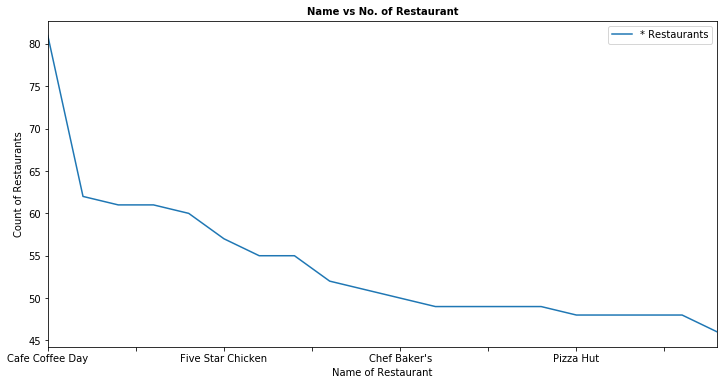

In [9]:
#Analyzing the number of restaurant and Names.
plt.figure(figsize = (12,6))
ax = df.name.value_counts()[:20].plot(kind = 'line')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs No. of Restaurant",fontsize =10, weight = 'bold')

Text(0.5, 1.0, 'Name vs No. of Restaurant')

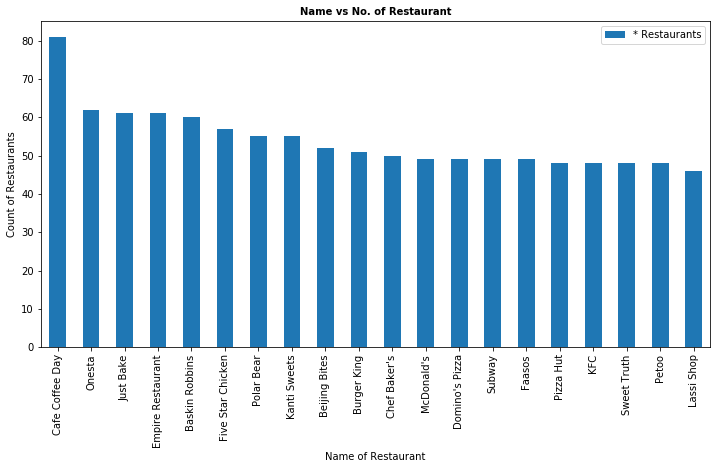

In [10]:
plt.figure(figsize = (12,6))
ax = df.name.value_counts()[:20].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs No. of Restaurant",fontsize =10, weight = 'bold')

In [11]:
#Analyzing number of resturants accepting online orders.
df.online_order.value_counts()

Yes    24330
No     17043
Name: online_order, dtype: int64

Text(0.5, 0, 'online orders')

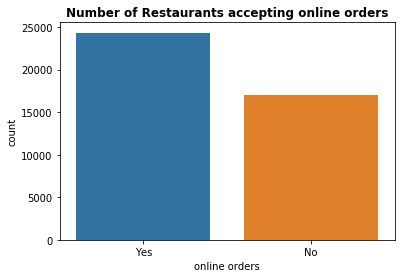

In [12]:
ax= sns.countplot(df['online_order'])
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')

Text(0, 0.5, 'No of restaurants')

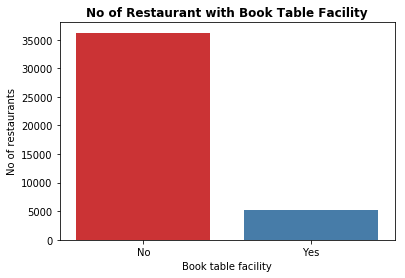

In [13]:
#Analyzing the number of resturants having "Boo a Table" option.
df['book_table'].value_counts()
sns.countplot(df['book_table'], palette= "Set1")
plt.title("No of Restaurant with Book Table Facility", weight = 'bold')
plt.xlabel('Book table facility')
plt.ylabel('No of restaurants')

In [14]:
#Analyzing the location where number of restursnts are large.
df['location'].value_counts()[:10]

BTM                      4077
HSR                      2005
Koramangala 5th Block    2002
JP Nagar                 1809
Whitefield               1717
Indiranagar              1639
Jayanagar                1542
Marathahalli             1498
Bannerghatta Road        1339
Electronic City          1016
Name: location, dtype: int64

##### :-BTM has the highest number of resturants in Bangalore.

In [15]:
#Resturant types:-
df['rest_type'].value_counts()

Quick Bites                    15295
Casual Dining                   8322
Cafe                            2960
Delivery                        2083
Dessert Parlor                  1815
Takeaway, Delivery              1634
Bakery                           913
Casual Dining, Bar               908
Beverage Shop                    678
Bar                              563
Food Court                       501
Sweet Shop                       369
Bar, Casual Dining               350
Lounge                           315
Pub                              293
Fine Dining                      278
Casual Dining, Cafe              248
Beverage Shop, Quick Bites       236
Bakery, Quick Bites              226
Mess                             218
Pub, Casual Dining               196
Sweet Shop, Quick Bites          149
Kiosk                            142
Cafe, Casual Dining              140
Cafe, Bakery                     135
Dessert Parlor, Cafe             132
Bakery, Dessert Parlor           119
C

In [16]:
df['approx_cost(for two people)'].value_counts()[:20]

300      6046
400      5263
500      3975
200      3871
600      2988
250      2338
800      1823
150      1684
700      1566
350      1401
1,000    1305
450      1146
100       804
1,200     796
1,500     783
650       638
550       614
750       612
900       554
1,300     415
Name: approx_cost(for two people), dtype: int64

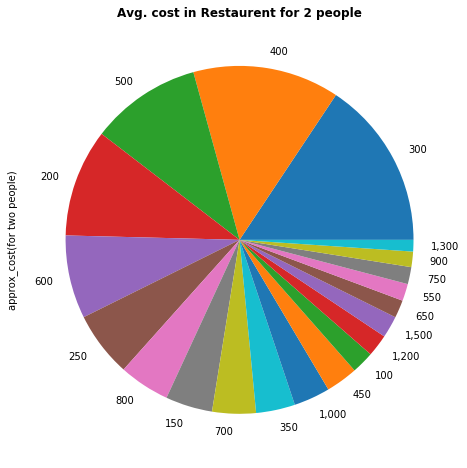

In [17]:
plt.figure(figsize = (12,8))
df['approx_cost(for two people)'].value_counts()[:20].plot(kind = 'pie')
plt.title('Avg. cost in Restaurent for 2 people', weight = 'bold')
plt.show()

#### The Average cost for two persons in Resturant in Banglore is 300rupees

In [18]:
df_dishes = df[df.dish_liked.notnull()]
df_dishes.dish_liked = df_dishes.dish_liked.apply(lambda x:x.lower().strip())
df_dishes.isnull().sum()

C:\RAKESH\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


name                             0
online_order                     0
book_table                       0
votes                            0
location                         0
rest_type                       56
dish_liked                       0
cuisines                         0
approx_cost(for two people)    111
reviews_list                     0
menu_item                        0
listed_in(type)                  0
rates                          144
dtype: int64

In [19]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in df_dishes.dish_liked:
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

Text(0, 0.5, 'Count')

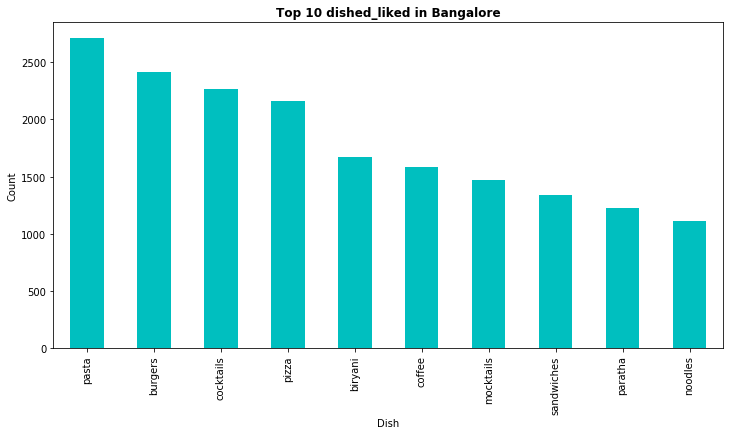

In [20]:
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:10].plot(kind='bar',color= 'c')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

#### It looks like people in Bangalore likes Pasta the most.

3.906723321858919


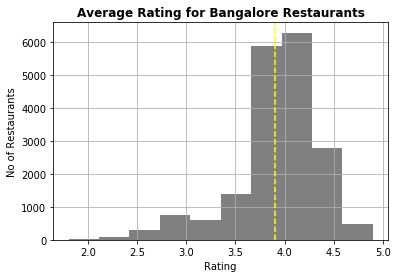

In [21]:
df['rates'] = df['rates'].replace('NEW',np.NaN)
df['rates'] = df['rates'].replace('-',np.NaN)
df.dropna(how = 'any', inplace = True)
df['rates'] = df.loc[:,'rates'].replace('[ ]','',regex = True)
df['rates'] = df['rates'].astype(str)
df['rates'] = df['rates'].apply(lambda r: r.replace('/5',''))
df['rates'] = df['rates'].apply(lambda r: float(r))
df.rates.hist(color='grey')
plt.axvline(x= df.rates.mean(),ls='--',color='yellow')
plt.title('Average Rating for Bangalore Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(df.rates.mean())

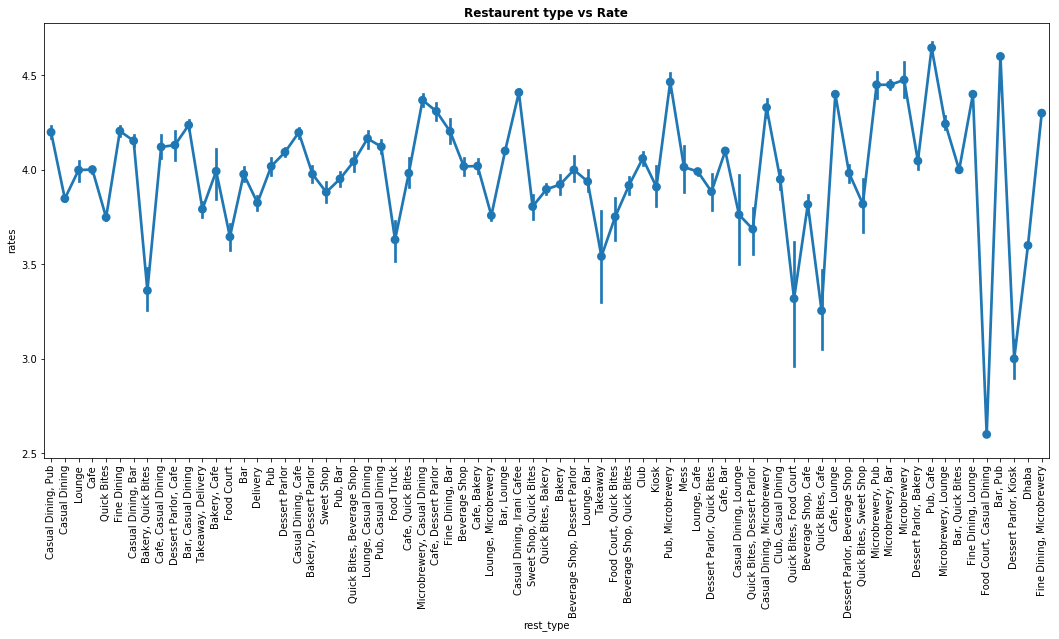

In [22]:
#Restaurant type Vs Rating
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=df["rest_type"], y=df["rates"], data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

In [23]:
df['online_order']= pd.get_dummies(df.online_order, drop_first=True)
df['book_table']= pd.get_dummies(df.book_table, drop_first=True)
df.head()

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),rates
1,The Boozy Griffin,0,1,5015,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,4.6
3,Sriracha,0,0,699,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,4.3
7,Chez Nous - Novotel,0,1,125,Marathahalli,Lounge,"Coffee, Cocktails, Tiramisu, Cappuccino, Hot C...","European, French, North Indian","2,500","[('Rated 5.0', 'RATED\n I will visit there la...",[],Dine-out,3.9
8,Maxpresso,0,0,324,Koramangala 7th Block,Cafe,"Burgers, Coffee, Waffles, Mocktails, Pasta, Br...","Cafe, American, Italian, Beverages",700,"[('Rated 4.0', 'RATED\n A pretty cafe in the ...",[],Delivery,4.1
9,Hyderabadi Biryani Hub,1,0,218,BTM,Casual Dining,"Biryani, Raita","Biryani, North Indian, Chinese",600,"[('Rated 3.0', 'RATED\n My friend ordered fri...",[],Delivery,3.6


In [24]:
#Droping columns who dont have ny relation to rates.
df.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)'], inplace  =True)

### Label Encoding.

In [25]:
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()

In [26]:
df['rest_type'] = df['rest_type'].str.replace(',' , '') 
df['rest_type'] = df['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df['rest_type'] = T.fit_transform(df['rest_type'])
df['location'] = T.fit_transform(df['location'])

In [27]:
df['cuisines'] = df['cuisines'].str.replace(',' , '') 
df['cuisines'] = df['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
df['cuisines'] = T.fit_transform(df['cuisines'])

In [28]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.replace(',' , '') 
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype('float')

In [29]:
df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),rates
1,The Boozy Griffin,0,1,5015,42,32,991,1800.0,4.6
3,Sriracha,0,0,699,48,29,267,1500.0,4.3
7,Chez Nous - Novotel,0,1,125,53,45,1078,2500.0,3.9
8,Maxpresso,0,0,324,44,21,45,700.0,4.1
9,Hyderabadi Biryani Hub,1,0,218,0,29,608,600.0,3.6


In [30]:
x = df.drop(['rates','name'],axis = 1)
y = df['rates']
print(x.shape)
print(y.shape)

(18592, 7)
(18592,)


In [31]:
#Splitng data into test and train set.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

In [32]:
#standarizing
#taking numeric values
from sklearn.preprocessing import StandardScaler
num_values1=df.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(df[num_values1])
df[num_values1]=scaler.transform(df[num_values1])

C:\RAKESH\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\RAKESH\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [33]:
df.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),rates
1,The Boozy Griffin,0,1,3.945124,42,32,991,2.011102,1.626822
3,Sriracha,0,0,0.083064,48,29,267,1.435326,0.922851
7,Chez Nous - Novotel,0,1,-0.430565,53,45,1078,3.354578,-0.015777
8,Maxpresso,0,0,-0.252495,44,21,45,-0.100075,0.453537
9,Hyderabadi Biryani Hub,1,0,-0.347347,0,29,608,-0.292000,-0.719748


#### 01- Linear Regresssion

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
lr.score(X_test, y_test)*100

20.360257011996207

#### 02-Random Forest

In [35]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test,y_test)*100

C:\RAKESH\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


87.69237736312749

#### 03-Ridge Regrression

In [36]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)
rdg.score(X_test,y_test)*100

20.360312259850645

### One Hot Encoding

In [37]:
onehot = pd.read_excel("zomato_train.xlsx")
onehot.head()

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4
3,https://www.zomato.com/bangalore/sriracha-lave...,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,+91 8041755366\n+91 7022422473,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
4,https://www.zomato.com/bangalore/sri-ganesh-ju...,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,+91 9845623889,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


In [38]:
onehot['rates'] = onehot['rates'].replace('NEW',np.NaN)
onehot['rates'] = onehot['rates'].replace('-',np.NaN)
onehot.dropna(how = 'any', inplace = True)

In [39]:
onehot['rates'] = onehot.loc[:,'rates'].replace('[ ]','',regex = True)
onehot['rates'] = onehot['rates'].astype(str)
onehot['rates'] = onehot['rates'].apply(lambda r: r.replace('/5',''))
onehot['rates'] = onehot['rates'].apply(lambda r: float(r))

In [40]:
onehot['cuisines'] = onehot['cuisines'].str.replace(',' , '') 
onehot['cuisines'] = onehot['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['cuisines'].unique()

array(['Continental European', 'Asian Chinese Indonesian Momos Thai',
       'European French Indian North', ...,
       'Beverages Chinese Desserts Fast Food Indian North',
       'BBQ Continental Indian Italian North',
       'Arabian BBQ Chinese Desserts Indian Juices Kebab North Rolls'],
      dtype=object)

In [41]:
onehot['rest_type'] = onehot['rest_type'].str.replace(',' , '') 
onehot['rest_type'] = onehot['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['rest_type'].value_counts().head()

Casual Dining        5885
Bites Quick          4180
Cafe                 1834
Bar Casual Dining    1041
Dessert Parlor        852
Name: rest_type, dtype: int64

In [42]:
onehot['dish_liked'] = onehot['dish_liked'].str.replace(',' , '') 
onehot['dish_liked'] = onehot['dish_liked'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
onehot['dish_liked'].value_counts().head()

Biryani            127
Friendly Staff      55
Waffles             50
Dosa Masala         44
Biryani Chicken     44
Name: dish_liked, dtype: int64

In [43]:
dummy_rest_type=pd.get_dummies(onehot['rest_type'])
dummy_city=pd.get_dummies(onehot['location'])
dummy_cuisines=pd.get_dummies(onehot['cuisines'])
dummy_dishliked=pd.get_dummies(onehot['dish_liked'])

In [44]:
final=pd.concat([onehot,dummy_rest_type,dummy_city,dummy_cuisines,dummy_dishliked],axis=1)

In [45]:
final.drop(columns=['rest_type','location','cuisines','dish_liked','name','phone'] , inplace=True)
final.drop(columns=['reviews_list','menu_item','listed_in(type)','listed_in(city)'], inplace=True)
final.drop(columns=['url','address'], inplace=True)

In [46]:
final['online_order']=pd.get_dummies(final['online_order'])
final['book_table']=pd.get_dummies(final['book_table'])
final.head()

,online_order,book_table,votes,approx_cost(for two people),rates,Bakery,Bakery Bites Quick,Bakery Cafe,Bakery Dessert Parlor,Bar,...,Sandwiches Tea,Shakes Thick,Shawarma,Tea,Thali,Thali Veg,Tikka,Vada,Vegetarian,Waffles
1,1,0,5015,"1,800",4.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,699,"1,500",4.3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,125,"2,500",3.9,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,218,600,3.6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,1,169,250,3.8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
final['approx_cost(for two people)'] = final['approx_cost(for two people)'].str.replace(',' , '') 

In [48]:
x = final.drop(['rates'],axis=1)
y = final['rates']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)

#### Linear regression

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
lr.score(X_test,y_test)*100

70.18416234615576

#### Random Forest Regression

In [51]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test,y_test)*100

C:\RAKESH\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


87.40506134487909

#### Ridge

In [52]:
from sklearn.linear_model import Ridge
rdg = Ridge()
rdg.fit(X_train,y_train)
y_pred_rdg = rdg.predict(X_test)
rdg.score(X_test,y_test)*100

85.43726194319652

#### compare the actual values and the predicted values

#### Prediction for Random forest Regressor

In [54]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred.head()

,actual,pred
27987,4.2,4.20
34650,4.1,4.10
3695,3.6,3.94
27287,3.9,3.94
16096,4.2,4.21
